In [1]:
# df.plot(kind='box')


In [ ]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load dataset
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\Data Analysis And Automation\Sample Data\data_jobs.csv")
df.head()

# cleaning the dataset
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
# only Data Analyst jobs in US

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
# drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [ ]:
df_DA_US['salary_year_avg'].sample(10)

205992    112000.0
288082     85000.0
529048    151950.0
507059    115000.0
358006     61353.0
84032     135000.0
734485     76500.0
179537     62500.0
727223     80000.0
549185     77500.0
Name: salary_year_avg, dtype: float64

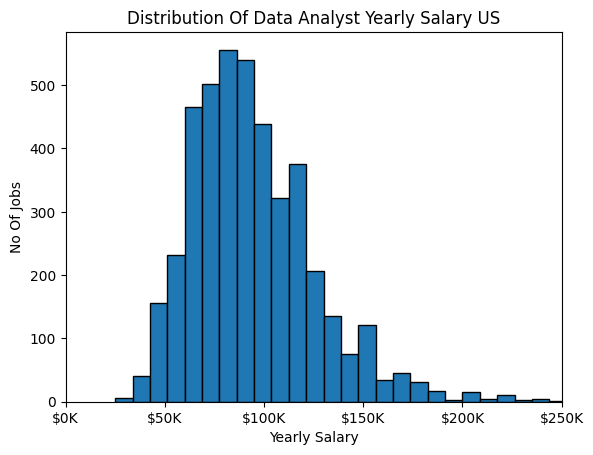

<Axes: >

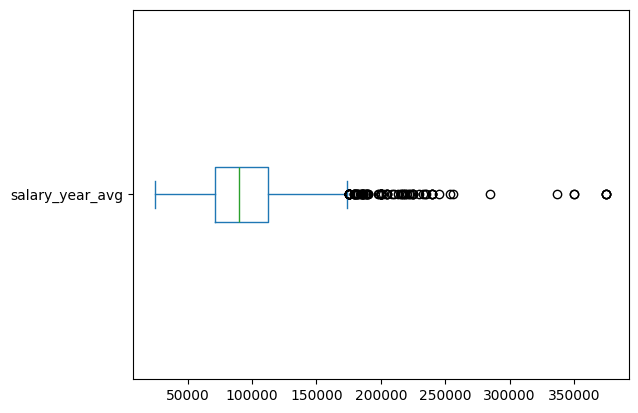

In [ ]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))
plt.title('Distribution Of Data Analyst Yearly Salary US')
plt.xlabel('Yearly Salary')
plt.ylabel('No Of Jobs')
plt.show()

df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

In [ ]:
# comparing more than one job title with different salaries in a boxplot
# i.e Data Analyst, Data Engineer and Data Scientist

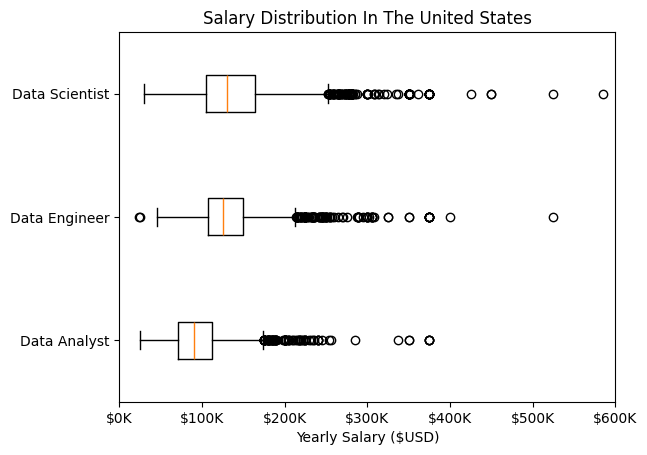

In [ ]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter to get appropriate job titles

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title('Salary Distribution In The United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000:.0f}K'))
plt.xlim(0, 600000)
plt.show()

In [ ]:
job_list[0] # Inspection

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64

In [ ]:
df_US['salary_year_avg'].value_counts() # inspection only

salary_year_avg
90000.0     672
115000.0    556
125000.0    472
150000.0    399
100000.0    310
           ... 
308500.0      1
126268.0      1
62623.0       1
135650.5      1
139216.0      1
Name: count, Length: 2031, dtype: int64

In [ ]:
df_US # inspection only

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",NaN,NaN
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."
